In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~`


In [2]:
Pkg.add(["Random","LinearAlgebra","FFTW","Plots"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [3]:
using Random, LinearAlgebra, FFTW, Plots

In [4]:
#Create a signal with two frequencies 
dt = 0.001
t = 0:dt:1
n = length(t)
f = sin.(2 * pi * 50 .* t) .+ sin.(2 * pi * 120 .* t) #clean signal 
f_noise = f .+ 1.5 * randn(n) #add noise 

1001-element Vector{Float64}:
  0.06069835504019608
  0.890949025845327
  0.5470678927492219
  1.4926298861613936
 -1.7865873431477557
  0.6299560522507743
  0.41635649383112583
 -0.638379960884606
 -1.5743500537362685
  2.3641531862340974
 -0.8270334030519808
 -1.6478046453443154
  1.0042937650978774
  ⋮
  0.1508639311012132
  0.051928040079701754
 -0.11260873150794204
 -2.483386731894122
 -2.0596935784344472
  0.40591064948326194
 -0.8211050274265532
 -3.1456177537192227
  0.03058084686381246
 -1.3600234590632814
 -0.8385432457376427
 -1.3703705103146515

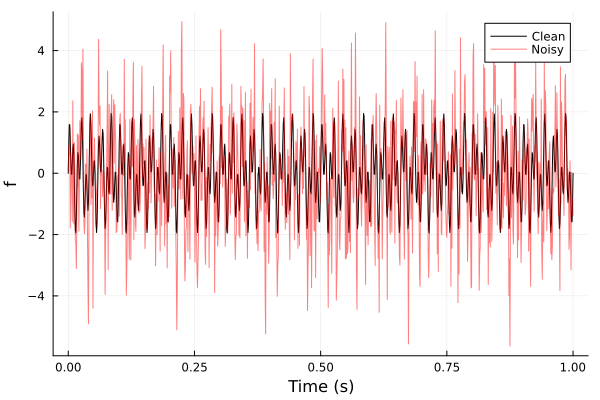

In [5]:
#Plot the clean and noisy signals
plot(t, f, label = "Clean", color = :black, xlabel = "Time (s)", ylabel = "f", legend = :topright)
plot!(t, f_noise, label = "Noisy", color = :red, alpha = 0.5)

In [6]:
#Compute the Fast Fourier Transform 
fft_n = fft(f_noise)
PSD = abs.(fft_n .* conj.(fft_n)/n) #Power spectrum (power per freq)
freq = (0:n-1) / (dt * n) #Frequency for the y-axis 

0.0:0.9990009990009989:999.000999000999

In [7]:
#Filter the noisy signal using the PSD
PSD_threshold = 100  #Set a threshold for filtering
indices = PSD .> PSD_threshold  #Find frequencies with power above the threshold
fhat_filtered = fft_n .* indices  #Zero out small Fourier coefficients
f_filtered = real(ifft(fhat_filtered))  #Inverse FFT for filtered time signal 

1001-element Vector{Float64}:
  0.5243072008161105
  1.4229275745394534
  1.7953555293814567
  1.557891325170068
  0.9214949343186908
  0.2695918210292102
 -0.05319370928797741
  0.07329771907929167
  0.48507260918572687
  0.832045624810469
  0.7798834552413377
  0.20521257577306157
 -0.7228219605826076
  ⋮
 -0.19559389083090967
 -0.8896010039759624
 -1.0543100818598408
 -0.7521509938151935
 -0.2880283379792481
 -0.030541891753987183
 -0.20108395581571245
 -0.7460400215724553
 -1.3620196840017744
 -1.6608359840256175
 -1.3848924728125536
 -0.5559225464515867

In [8]:
#Compute the PSD for the filtered signal
fft_filtered = fft(f_filtered)  #FFT of the filtered signal
PSD_filtered = abs.(fft_filtered .* conj.(fft_filtered)) / n  #PSD for filtered signal

1001-element Vector{Float64}:
 1.0750503431453751e-33
 1.8152393022878614e-32
 2.1155174783336327e-32
 3.9031687360891546e-32
 2.4435386723214786e-32
 1.0512441232562129e-32
 1.040153455701009e-32
 1.9187809479706592e-32
 1.7435228474170892e-31
 2.7283109335036107e-32
 5.398418739799862e-32
 1.1174118802516305e-32
 2.3173225915779728e-33
 ⋮
 2.317322591577971e-33
 3.5825843827609367e-32
 1.8700170764706103e-31
 2.72831093350361e-32
 1.7435228474170888e-31
 1.918780947970659e-32
 1.0401534557010091e-32
 1.0512441232562131e-32
 2.4435386723214797e-32
 4.875864875293263e-32
 1.6575923185962648e-31
 1.8152393022878616e-32

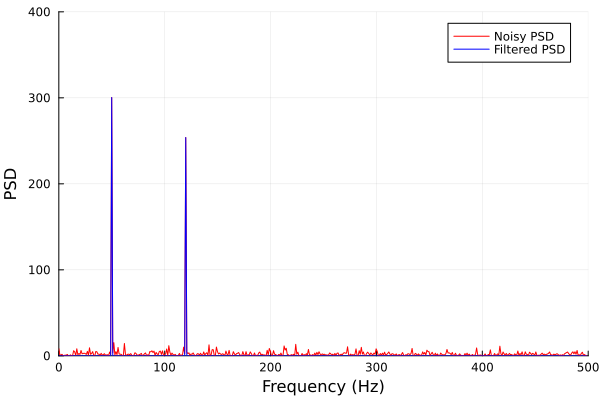

In [11]:
#Plot the PSD for noisy and filtered signals
L = 1:floor(Int, n/2)  # Indices for the first half of the frequencies
plot(freq[L], PSD[L], label = "Noisy PSD", color = :red, xlabel = "Frequency (Hz)", ylabel = "PSD", legend = :topright, ylim = (0, 400), xlim = (0, 500))
plot!(freq[L], PSD_filtered[L], label = "Filtered PSD", color = :blue)

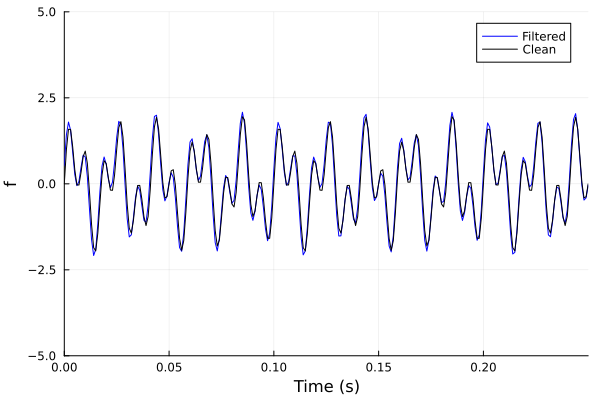

In [10]:
plot(t, f_filtered, label = "Filtered", color = :blue, xlabel = "Time (s)", ylabel = "f", xlim = (0,0.25), ylim =  (-5,5))
plot!(t, f, label = "Clean", color = :black) 